In [24]:
from tensorflow.keras.datasets import imdb

((XT,YT),(Xt,Yt)) = imdb.load_data(num_words=10000)

print('Dataset Loaded!')

Dataset Loaded!


In [25]:
print("The length of the Training Dataset is ", len(XT))
print("The length of the Testing Dataset is ", len(Xt))


The length of the Training Dataset is  25000
The length of the Testing Dataset is  25000


In [26]:
word_idx = imdb.get_word_index()
idx_word = dict([value,key] for (key,value) in word_idx.items())
actual_review = ' '.join([idx_word.get(idx-3,'?') for idx in XT[0]])
print(actual_review)
print(len(actual_review.split()))

? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you thi

In [27]:
from tensorflow.keras.preprocessing import sequence

X_train = sequence.pad_sequences(XT,maxlen=500)
X_test = sequence.pad_sequences(Xt,maxlen=500)

print("Padding Completed!")

Padding Completed!


In [13]:
print(X_train.shape)
print(X_test.shape)
print(X_train[0])

(25000, 500)
(25000, 500)
[   0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0 

In [28]:
from tensorflow.keras.layers import Embedding,SimpleRNN,Dense
from tensorflow.keras.models import Sequential

model = Sequential()
model.add(Embedding(10000,64))
model.add(SimpleRNN(32))
model.add(Dense(1,activation='sigmoid'))
print(model.summary())

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, None, 64)          640000    
                                                                 
 simple_rnn_1 (SimpleRNN)    (None, 32)                3104      
                                                                 
 dense_1 (Dense)             (None, 1)                 33        
                                                                 
Total params: 643137 (2.45 MB)
Trainable params: 643137 (2.45 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None


In [29]:
model.compile(optimizer='rmsprop',loss='binary_crossentropy',metrics=['acc'])

print("Model Compiled Successfully!")
print(model.loss)

Model Compiled Successfully!
binary_crossentropy


In [30]:
from tensorflow.python.keras.callbacks import ModelCheckpoint
from tensorflow.python.keras.callbacks import EarlyStopping

checkpoint = ModelCheckpoint("best_model.h5", monitor='val_loss', verbose=0, save_best_only=True, save_weights_only=False)
earlystop = EarlyStopping(monitor='val_acc',patience=1)

print("Callbacks Created Successfully!")

Callbacks Created Successfully!


In [35]:
hist = model.fit(X_train,YT,validation_split=0.2,epochs=10,batch_size=128,callbacks=[checkpoint,earlystop])

Epoch 1/10
157/157 [==============================] - 10s 64ms/step - loss: 0.0099 - acc: 0.9977 - val_loss: 0.7683 - val_acc: 0.8234
Epoch 2/10
157/157 [==============================] - 10s 62ms/step - loss: 0.0087 - acc: 0.9976 - val_loss: 0.7606 - val_acc: 0.8304
Epoch 3/10
157/157 [==============================] - 10s 63ms/step - loss: 0.0091 - acc: 0.9973 - val_loss: 0.8347 - val_acc: 0.8112


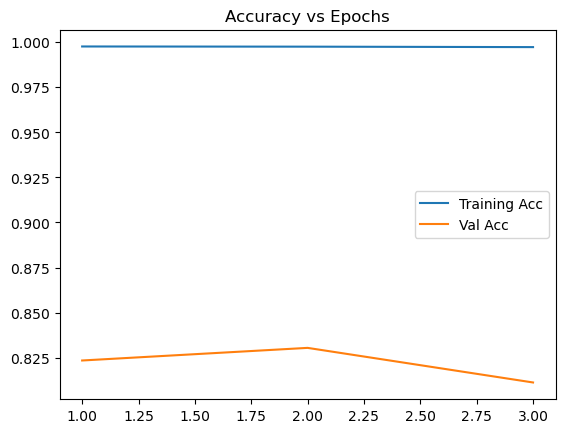

In [36]:
import matplotlib.pyplot as plt
import numpy as np

acc = hist.history['acc']
val_acc = hist.history['val_acc']
epochs = range(1,len(acc)+1)

plt.title("Accuracy vs Epochs")
plt.plot(epochs,acc,label="Training Acc")
plt.plot(epochs,val_acc,label="Val Acc")
plt.legend()
plt.show()

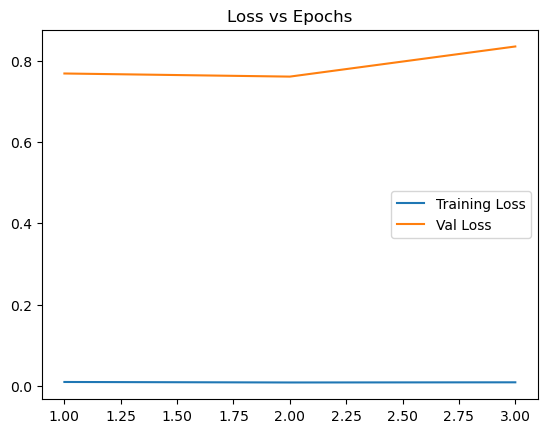

In [37]:
import matplotlib.pyplot as plt

loss = hist.history['loss']
val_loss = hist.history['val_loss']
epochs = range(1,len(loss)+1)

plt.title("Loss vs Epochs")
plt.plot(epochs,loss,label="Training Loss")
plt.plot(epochs,val_loss,label="Val Loss")
plt.legend()
plt.show()

In [38]:
model.evaluate(X_test,Yt)

782/782 [==============================] - 8s 10ms/step - loss: 0.8637 - acc: 0.8046


[0.8637349009513855, 0.804639995098114]

In [46]:
# Import the required libraries
from tensorflow.keras.datasets import imdb
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.preprocessing import sequence
from tensorflow.keras.layers import Embedding,SimpleRNN,Dense
from tensorflow.keras.models import Sequential

# Load the Dataset
((XT,YT),(Xt,Yt)) = imdb.load_data(num_words=30000)
print("The length of the Training Dataset is ", len(XT))
print("The length of the Testing Dataset is ", len(Xt))

# Perform the padding
X_train = sequence.pad_sequences(XT,maxlen=500)
X_test = sequence.pad_sequences(Xt,maxlen=500)

# Create the Model Architecture
model = Sequential()
model.add(Embedding(30000,128))
model.add(SimpleRNN(64))
model.add(Dense(1,activation='sigmoid'))

# Compile the Model
model.compile(optimizer='rmsprop',loss='binary_crossentropy',metrics=['acc'])

# Create the Callbacks
checkpoint = ModelCheckpoint("best_model.h5", monitor='val_loss', verbose=0, save_best_only=True, save_weights_only=False)
earlystop = EarlyStopping(monitor='val_acc',patience=1)

# Train the Model
hist = model.fit(X_train,YT,validation_split=0.2,epochs=20,batch_size=128,callbacks=[checkpoint])

# Evaluate the Model on Test Dataset
model.evaluate(X_test,Yt)

The length of the Training Dataset is  25000
The length of the Testing Dataset is  25000
Epoch 1/20
157/157 [==============================] - 24s 149ms/step - loss: 0.6229 - acc: 0.6322 - val_loss: 1.0083 - val_acc: 0.5294
Epoch 2/20
157/157 [==============================] - 22s 142ms/step - loss: 0.4059 - acc: 0.8220 - val_loss: 0.4523 - val_acc: 0.7990
Epoch 3/20
157/157 [==============================] - 21s 136ms/step - loss: 0.2839 - acc: 0.8863 - val_loss: 0.4112 - val_acc: 0.8352
Epoch 4/20
157/157 [==============================] - 23s 148ms/step - loss: 0.1669 - acc: 0.9384 - val_loss: 0.4982 - val_acc: 0.8032
Epoch 5/20
157/157 [==============================] - 24s 150ms/step - loss: 0.0884 - acc: 0.9701 - val_loss: 0.6105 - val_acc: 0.7832
Epoch 6/20
157/157 [==============================] - 24s 151ms/step - loss: 0.0409 - acc: 0.9873 - val_loss: 0.8305 - val_acc: 0.7318
Epoch 7/20
157/157 [==============================] - 25s 159ms/step - loss: 0.0262 - acc: 0.9916 - v

[1.2411490678787231, 0.7713599801063538]

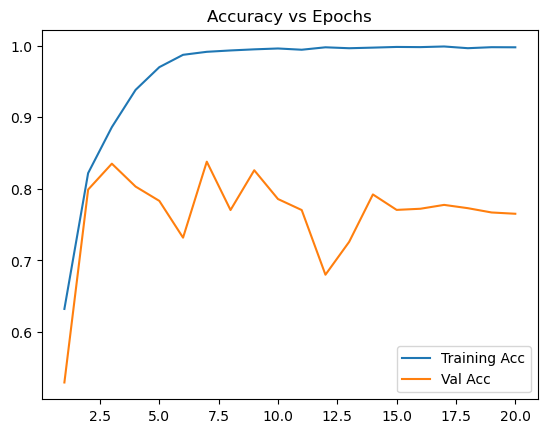

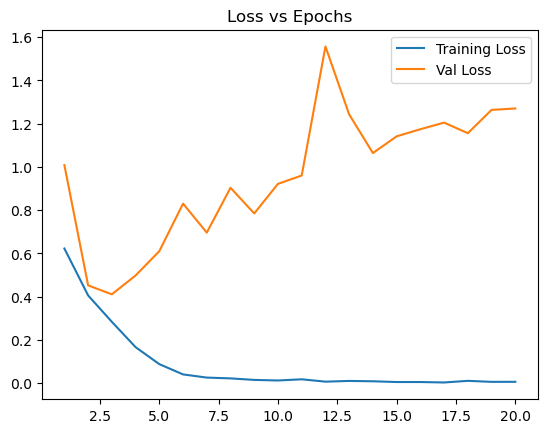

In [47]:
import matplotlib.pyplot as plt

# Validation Accuracy vs Training Accuracy
acc = hist.history['acc']
val_acc = hist.history['val_acc']
epochs = range(1,len(acc)+1)
plt.title("Accuracy vs Epochs")
plt.plot(epochs,acc,label="Training Acc")
plt.plot(epochs,val_acc,label="Val Acc")
plt.legend()
plt.show()

# Validation Loss vs Training Loss
loss = hist.history['loss']
val_loss = hist.history['val_loss']
epochs = range(1,len(loss)+1)
plt.title("Loss vs Epochs")
plt.plot(epochs,loss,label="Training Loss")
plt.plot(epochs,val_loss,label="Val Loss")
plt.legend()
plt.show()

In [56]:
sent = "This movie is really bad . I do not like this movie because the direction was horrible ."
sent2 = "The movie was not bad . but i felt the storyline was little bit boring. although action scene was good, i won't be looking for sequal movie."
sent3 = "the movie's storyline was not good, but the action scene impressed me. if the script had more connection, it could be the perfect movie ."
inp = []

# Get the word:integer mapping
word_idx = imdb.get_word_index()

# Convert each word to integer
for word in sent3.split():
  if word in word_idx.keys():
    inp.append(word_idx[word])
  else:
    inp.append(1)

print(inp) 

# Perform the padding
final_input = sequence.pad_sequences([inp],maxlen=500)

# Finally predict the sentiment
a=model.predict(final_input)
p=a[0][0]
print('predicted:',p)
if p>=0.5:
    print('Negative Review')
else:
    print('Positive Review')

[1, 1324, 766, 13, 21, 1, 18, 1, 203, 133, 1552, 1, 45, 1, 226, 66, 50, 1, 9, 97, 27, 1, 401, 17, 1]
1/1 [==============================] - 0s 32ms/step
predicted: 5.625021e-05
Positive Review
